## Magnetic Fibre Analysis

The magnetic fibre can be modelled as an elastic beam clamped at two ends. Due to the presence of powderised neodymium magnets in the fibre, it exerts a permanent magnetic field around itself. The fibre is also enclosed in a hydrogel, which can be modelled as a continuous elastic material. The fibre is actuated (displaced) by an external magnetic field, provided by e.g. an electromagnet.

The following conditions must be met:
- The bending stresses in the fibre must not cause it to yield. A safer criterion is to ensure that the maximum stress is less than half of the yield stress, to provide protection against fatigue-induced failure.
- The stress in the hydrogel surface must not cause it to fail. Otherwise, the fibre will cut through it and destroy the material.

#### Model Setup:

<img src="diagram.png" width="500"/>

#### Assumptions:

- The system and forces are all symmetric about the vertical axis.
- Gravity (self-weight) is neglected.
- The materials are all linear elastic.
- Only steady-state behaviour is considered i.e. no time dependence, no viscosity.

#### Parameter Definitions

- $ 2L $: length of fibre. [$m$]
- $A$: cross-sectional area of fibre. [$m^2$]
- $E$: Young’s modulus of fibre. [$N/m^2$]
- $B = EI$: flexural rigidity (modulus times second moment of inertia) of fibre. [$Nm^2$]
- $x$: position coordinate along fibre length, so that the fibre runs from $ -L \leq x \leq L $. [$m$]
- $y$: position coordinate in transverse direction, measuring displacement. [$m$]
- $ \omega(x) $: force per unit length on the fibre at position x. [$N/m$]
- $F$: net force exerted by magnetic field, so the reaction force at each clamp is $ \frac{F}{2} $. [$N$].

By definition, $ F = \int_{-L}^{L} \omega(x) dx = 2 \int_{0}^{L} \omega(x) dx $ since the system is symmetric (even function).

#### Analysis

We can model the situation as a doubly-clamped (statically indeterminate) beam subject to a symmetric distributed load $ \omega(x) $, superimposed with the resistive forces exerted by the hydrogel medium.

To restore static determinacy, consider the deformation of the beam under only the external load $ \omega(x) $, with pinned supports. The variation of the internal bending moment $ M_B(x) $ is

$$ M_B(x) = \frac{x + L}{2} \times \int_{-L}^{x} (\omega(x) - F) \ \text{d}x. $$

The angular rotation $ \psi(x) $ satisfies $ M_B(x) = EI \psi'(x) $, so the end rotation $ \psi_L $ is given by

$$ \psi_L = \int_0^{\psi_L} \text{d}\psi = \frac{1}{EI} \int_{0}^{L} M_B(x) \ \text{d}x. $$

By compatibility, the clamping moment $ M_C $ at each fixed support is therefore

$$ \frac{2}{3} \psi_L = \frac{2ML}{3EI} \ \Rightarrow \ M_C = \frac{\psi_L EI}{3}. $$

By superposition, the variation of bending moment $ M(x) $ in indeterminate case is

$$ M(x) = M_C + M_B(x). $$

Then $ M(\pm L) = M_C $, and in general,

$$ \psi(x) = \int_0^{\psi(x)} \ \text{d}\psi = \frac{1}{EI} \int_{-L}^{x} M(x) \ \text{d}x \ \ \ \text{and} \ \ \ y(x) = \int_0^{y(x)} \ \text{d}y = -\int_{-L}^{x} \psi(x) \ \text{d} x. $$

The midspan maximum deflection is $ y(0) $.

The components of $ \omega(x) $ can be separated into the magnetic force $ m(x) $ and a contact force $ \lambda(x) $ per unit length exerted due to the stress induced by the displacement of the hydrogel:

$$ \omega(x) = m(x) + \lambda(x). $$

In principle, both components involve feedback with the displacement $ y(x) $, since more displacement towards the externally applied magnet will increase the force applied to the fibre, as well as straining the hydrogel further, causing it to resist the movement more. These two effects are in opposing directions. A closed form solution is only available if we let $ k = 0 $, so that the hydrogel does not resist the displacement. In this case, the force per unit length is

$$ \omega(x) = m_0, \ \ \ \ \ \ \ \ k = 0. $$

Applying the elastic law $ M(x) = -EI y''(x) $, differentiating twice, and applying the boundary conditions $ y(-L) = y(L) = y'(-L) = y'(L) = 0 $, the equations for the bending moment and deflection of the beam are

$$ y''''(x) = -\frac{m_0}{EI} \ \ \Rightarrow \ \ M(x) = \frac{m_0}{6}(3x^2 - L^2), \ \ y(x) = \frac{m_0}{24EI} (2L^2x^2 - x^4 - L^4). $$

The peak bending moment and displacement are then 

$$ M_{max} = |M(\pm L)| = \frac{m_0L^2}{3}, \ \ \ \ \ y_{max} = |y(0)| = \frac{m_0L^4}{24EI}. $$

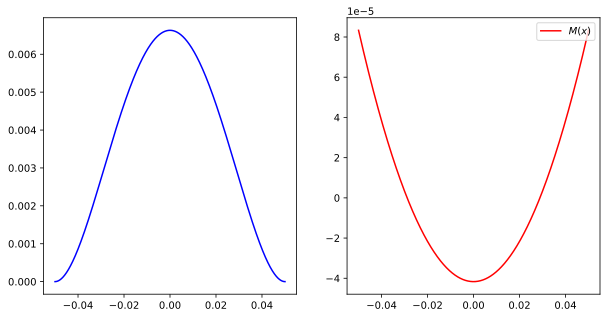

In [3]:
# modules
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np
from scipy.integrate import solve_ivp, solve_bvp

%matplotlib notebook
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# constants
L = 0.05  # half-length of the fibre [m]
E = 5e6  # Young's modulus [Pa], estimated from the literature
I = np.pi / 4 * (0.002 / 2) ** 4  # second moment of area [m^4], I = pi/4 * r^4, diameter 2 mm
m_0 = 0.1  # magnetic force per unit length [N/m]
# B = E * I = 4e-6  # bending stiffness [N*m^2]
k = 0.000  # hydrogel "modulus" [N/m^2]

x_pts = np.linspace(-L, L, 1000)
y_pts = m_0 / (-24 * E * I) * (2 * L ** 2 * x_pts ** 2 - x_pts ** 4 - L ** 4)
M_pts = m_0 / 6 * (3 * x_pts ** 2 - L ** 2)

# add twin axis for moment
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1.plot(x_pts, y_pts, 'b', label='$ y(x) $')
ax2.plot(x_pts, M_pts, 'r', label='$ M(x) $')
#ax2.set_xlabel('Position along the fibre [m], $ -L \leq x \leq L $')
#ax2.set_ylabel('Transverse displacement [m], $ y(x) $')
#ax2.set_ylabel('Bending moment [N m], $ M(x) $')
#ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

The maximum stress in the fibre must be less than half its yield stress, to protect against both plastic yield and fatigue failure:

$$ \sigma_{max} = \frac{M_{max} r}{I} = \frac{4 m_0 L^2}{3 \pi r^3} \leq \frac{\sigma_y}{2} \ \ \ \Rightarrow \ \ \ \frac{8 m_0 L^2}{3 \pi r^3} \leq \sigma_y. $$

At limiting performance, the corresponding performance index is $ \frac{\sigma_y^2 r^2}{m_0 E} $.

If we assume that $ m_0 = m_V A = \frac{\pi} r^2 m_V $, then the performance index is $ \frac{\sigma_y^2}{m_V E} $.

This appears as the materials below a line with gradient 2 on a log-log plot of $ E $ against $ \sigma_y $, while having a small magnetic force per unit volume.

The mechanical properties of the fibre will also depend on its magnetic particle content, so there is more work to be done in working out the optimal fibre design.